### A Jupyter Notebook exploring the Scipy.Stats module for Python. [scipy.stats offfical](https://docs.scipy.org/doc/scipy/reference/stats.html)
The Scipy.Stats module for Python offers a wide array of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more. Since statistics is such a large discipline and covers many areas, there are other Python modules for areas such as machine learning, classification, regression, model selection and so on.<br> 
One particular area of interest for the purpose of this demonstration is statistical testing.
#### ANOVA Testing
One-way analysis of variance (ANOVA) testing is performed on 2 or more independent groups to determine if there are any statistically significant differences between the means of the groups. The test is generally performed on three or more groups with a t-test being performed when there are two groups, however for the purpose of this example a one-way ANOVA will be used. [Laerd Statistics](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php)<br>
#### Assumptions
As part of the one-way ANOVA process, the data must be checked against 6 assumptions to ensure that the data can actually be analysed using a one-way ANOVA. Each of the 6 assumptions will be explored further in this notebook.
***
Import Python modules

In [1]:
# import modules
# numerical operations
import numpy as np

# general plotting
import matplotlib.pyplot as plt

# data frames
import pandas as pd

# statistical operations
import scipy.stats as ss

# statistical plots
import seaborn as sns

#### Example One-Way ANOVA: Golf Ball driving distance dataset
***
A golf ball manufacturer is testing to see that there is no significant change in driving distance between the current golf ball design and the new golf ball design.
* **Null Hypothesis** (desired outcome) - The change in golf ball design has no effect on driving distance (mean of the current and new ball are almost same)
<br><br>
* **Alternative Hypothesis** - The change in golf ball design has a significant effect on driving distance (mean of the current and new ball are significantly different).

In [2]:
# read in the dataset
df = pd.read_csv('https://raw.githubusercontent.com/killfoley/ML-and-Stats/main/data/golf_ball.csv')
df

,ball,distance
0,current,264
1,current,261
2,current,267
3,current,272
4,current,258
...,...,...
115,prototype,255
116,prototype,268
117,prototype,260
118,prototype,258


<br>

#### Assumption 1 - The dependent variable should be measured at the interval or ratio level  
(in this case metres probably actually yards)
***

In [3]:
# dependent variable
v_dep = df['distance']
v_dep

0      264
1      261
2      267
3      272
4      258
      ... 
115    255
116    268
117    260
118    258
119    274
Name: distance, Length: 120, dtype: int64

In [4]:
# describe the data
v_dep.describe()

count    120.00000
mean     269.77500
std        9.45619
min      250.00000
25%      263.00000
50%      269.00000
75%      275.25000
max      294.00000
Name: distance, dtype: float64

<br>

#### Assumption 2 - The independent variable should consist of two or more categorical, independent groups.
***

In [5]:
# independent variabl
v_indep = df['ball']
v_indep

0        current
1        current
2        current
3        current
4        current
         ...    
115    prototype
116    prototype
117    prototype
118    prototype
119    prototype
Name: ball, Length: 120, dtype: object

Note: There are three independent categories 'current', 'new', and 'prototype'

<br>

**Assumption 3** - There should be independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.<br>
<br>
This cannot really be shown using the data, it is more of an experiment design issue. Considering the nature of this study it is safe to say that the two different types of golf ball are totally independent of each other so assumption 3 is satisfied in this case.
***
<br>

**Assumption 4** - There should be no significant outliers.
***
Data visualisation is a very effective way to identify any outliers [Medium: detecting outliers](https://medium.com/analytics-vidhya/outliers-in-data-and-ways-to-detect-them-1c3a5f2c6b1e). Outliers are single data points that do not follow the general trend of the rest of the data.  For this a box plot will be used from the Seaborn package [Seaborn: Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html).  


<AxesSubplot:xlabel='distance', ylabel='ball'>

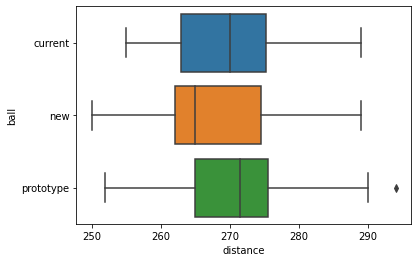

In [6]:
# Boxplot of variables
sns.boxplot(x=v_dep, y=v_indep)

There appear to be no outliers in this dataset.
***

<br>

**Assumption 5** - The dependent variable should be approximately normally distributed for each category of the independent variable.
Testing for normality is performed using the Shapiro-Wilk test of normality. 
[Scipy.Stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
***

In [7]:
# Get the distance values for the current golf ball using pandas query
x_current = df.query('ball=="current"')['distance']
x_current

0     264
1     261
2     267
3     272
4     258
5     283
6     258
7     266
8     259
9     270
10    263
11    264
12    284
13    263
14    260
15    283
16    255
17    272
18    266
19    268
20    270
21    287
22    289
23    280
24    272
25    275
26    265
27    260
28    278
29    275
30    281
31    274
32    273
33    263
34    275
35    267
36    279
37    274
38    276
39    262
Name: distance, dtype: int64

In [8]:
# get the distance values for the new ball
x_new = df.query('ball=="new"')['distance']
x_new

40    277
41    269
42    263
43    266
44    262
45    251
46    262
47    289
48    286
49    264
50    274
51    266
52    262
53    271
54    260
55    281
56    250
57    263
58    278
59    264
60    272
61    259
62    264
63    280
64    274
65    281
66    276
67    269
68    268
69    262
70    283
71    250
72    253
73    260
74    270
75    263
76    261
77    255
78    263
79    279
Name: distance, dtype: int64

In [9]:
# Perform shapiro test on both sets of data
shapiro_test_current = ss.shapiro(x_current)
shapiro_test_current

ShapiroResult(statistic=0.9707045555114746, pvalue=0.37878310680389404)

In [10]:
# Peform for new golf ball
shapiro_test_new = ss.shapiro(x_new)
shapiro_test_new

ShapiroResult(statistic=0.9678265452384949, pvalue=0.3064688742160797)

Both datasets have a high probability of being normally distributed with a p values significantly > 0.05
***

**Data Visualisation Plot**

Use a distribution plot from Seaborn. Display each of the datasets with the kernel density estimation displayed. This is a nice way of visualising the probability distribution of variables together.

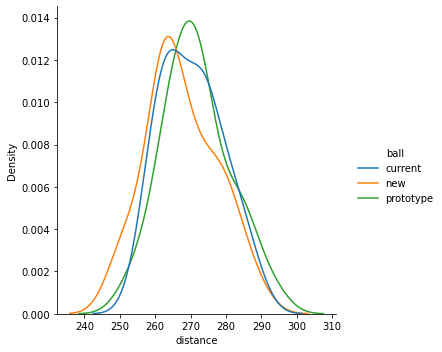

In [11]:
# KDEs of the two types of golf ball.
sns.displot(x=v_dep, hue=v_indep, kind="kde")